Credit Scoring Model


Classification Report:

              precision    recall  f1-score   support

           0       0.70      0.72      0.71      2219
           1       0.74      0.54      0.62      1309
           2       0.82      0.87      0.85      5986

    accuracy                           0.79      9514
   macro avg       0.75      0.71      0.73      9514
weighted avg       0.78      0.79      0.78      9514


ROC-AUC Score: 0.8928776733091525


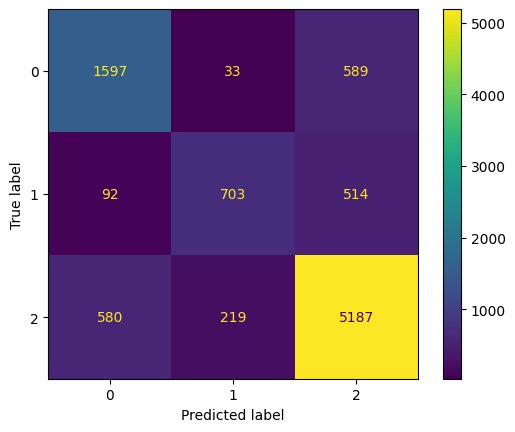

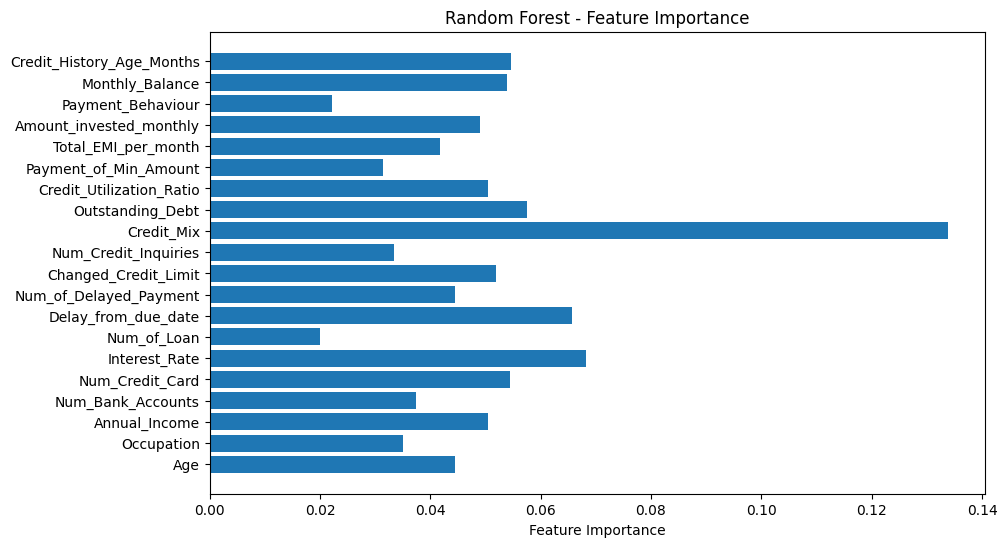

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, ConfusionMatrixDisplay

# Load dataset
df = pd.read_csv("Credit_Score_Clean.csv")
df = df.drop_duplicates()  # Remove duplicates if any

# Encode categorical columns
categorical_cols = ['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score']
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Define input features and target variable
X = df.drop("Credit_Score", axis=1)
y = df["Credit_Score"]

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

print("\nROC-AUC Score:", roc_auc_score(y_test, y_proba, multi_class='ovr'))

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)
plt.show()

# Feature Importance Plot
importances = rf.feature_importances_
feature_names = X.columns
plt.figure(figsize=(10,6))
plt.barh(feature_names, importances)
plt.xlabel("Feature Importance")
plt.title("Random Forest - Feature Importance")
plt.show()
